In [34]:
# Load dataset 
import pandas as pd
d = pd.read_csv("Datasets/student_data_1.csv", sep=';')
len(d)

395

In [35]:
d['pass'] = d.apply(lambda row:1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0


In [36]:
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                                'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [38]:
d = d.sample(frac=1)

d_train = d[:300]
d_test = d[300:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

import numpy as np
print("Passing %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing 166 out of 395 (42.03%)


In [39]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [40]:
tree.export_graphviz(t, out_file="student-preformance.dot", label="all", impurity=False, proportion=True, 
                    feature_names=list(d_train_att), class_names=["fail", "pass"], filled=True, rounded=True)

In [41]:
t.score(d_test_att, d_test_pass)

0.5789473684210527

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)

print("Accuracy: %0.2f (+\- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+\- 0.07)


In [50]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Acuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Acuracy: 0.58 (+/- 0.01)
Max depth: 2, Acuracy: 0.57 (+/- 0.04)
Max depth: 3, Acuracy: 0.57 (+/- 0.10)
Max depth: 4, Acuracy: 0.54 (+/- 0.07)
Max depth: 5, Acuracy: 0.55 (+/- 0.08)
Max depth: 6, Acuracy: 0.57 (+/- 0.04)
Max depth: 7, Acuracy: 0.55 (+/- 0.06)
Max depth: 8, Acuracy: 0.57 (+/- 0.06)
Max depth: 9, Acuracy: 0.55 (+/- 0.10)
Max depth: 10, Acuracy: 0.58 (+/- 0.07)
Max depth: 11, Acuracy: 0.55 (+/- 0.03)
Max depth: 12, Acuracy: 0.59 (+/- 0.05)
Max depth: 13, Acuracy: 0.58 (+/- 0.09)
Max depth: 14, Acuracy: 0.55 (+/- 0.08)
Max depth: 15, Acuracy: 0.58 (+/- 0.04)
Max depth: 16, Acuracy: 0.57 (+/- 0.07)
Max depth: 17, Acuracy: 0.59 (+/- 0.05)
Max depth: 18, Acuracy: 0.56 (+/- 0.06)
Max depth: 19, Acuracy: 0.56 (+/- 0.06)


In [51]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
depth_acc

array([[1.00000000e+00, 5.79746835e-01, 1.01265823e-02],
       [2.00000000e+00, 5.67088608e-01, 4.35560773e-02],
       [3.00000000e+00, 5.72151899e-01, 9.92198377e-02],
       [4.00000000e+00, 5.41772152e-01, 6.86818226e-02],
       [5.00000000e+00, 5.56962025e-01, 9.33624755e-02],
       [6.00000000e+00, 5.67088608e-01, 3.35860738e-02],
       [7.00000000e+00, 5.56962025e-01, 7.33740595e-02],
       [8.00000000e+00, 5.79746835e-01, 2.95238071e-02],
       [9.00000000e+00, 5.54430380e-01, 8.82814976e-02],
       [1.00000000e+01, 5.69620253e-01, 7.16057500e-02],
       [1.10000000e+01, 5.59493671e-01, 4.90904289e-02],
       [1.20000000e+01, 5.74683544e-01, 1.16125012e-01],
       [1.30000000e+01, 5.69620253e-01, 5.77304013e-02],
       [1.40000000e+01, 5.59493671e-01, 7.05234849e-02],
       [1.50000000e+01, 5.77215190e-01, 1.24024797e-02],
       [1.60000000e+01, 5.72151899e-01, 4.35560773e-02],
       [1.70000000e+01, 5.67088608e-01, 2.48049594e-02],
       [1.80000000e+01, 5.82278

Matplotlib is building the font cache; this may take a moment.


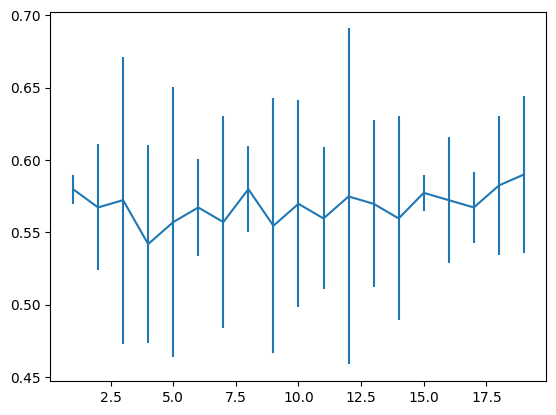

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()